In [ ]:
!pip install neuralprophet[live]

     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 748.8 MB 17 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu102 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.


In [2]:
import pandas as pd
from scipy import fft, stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn import linear_model
import datetime
#from neuralprophet import NeuralProphet

In [3]:
df = pd.read_csv("/content/complete_sureste.csv")
df.head()

,Fecha,O3,PM10,PM2.5,SO2,CO,TOUT,RH,PRS,WS,RAINF,SR
0,1/1/17 0:00,6.0,50.240716,18.443862,11.8,3.77,18.71,72.0,720.5,8.8,0.007,0.007
1,1/1/17 1:00,5.0,373.000000,349.000000,16.7,3.01,19.67,64.0,720.1,13.1,0.007,0.007
2,1/1/17 2:00,4.0,50.240716,187.000000,16.1,1.80,22.33,51.0,719.6,12.9,0.007,0.007
3,1/1/17 3:00,4.0,124.000000,101.000000,13.7,2.11,20.51,58.0,719.5,9.1,0.007,0.007
4,1/1/17 4:00,4.0,50.240716,81.000000,11.9,1.77,20.22,60.0,719.1,9.2,0.007,0.007


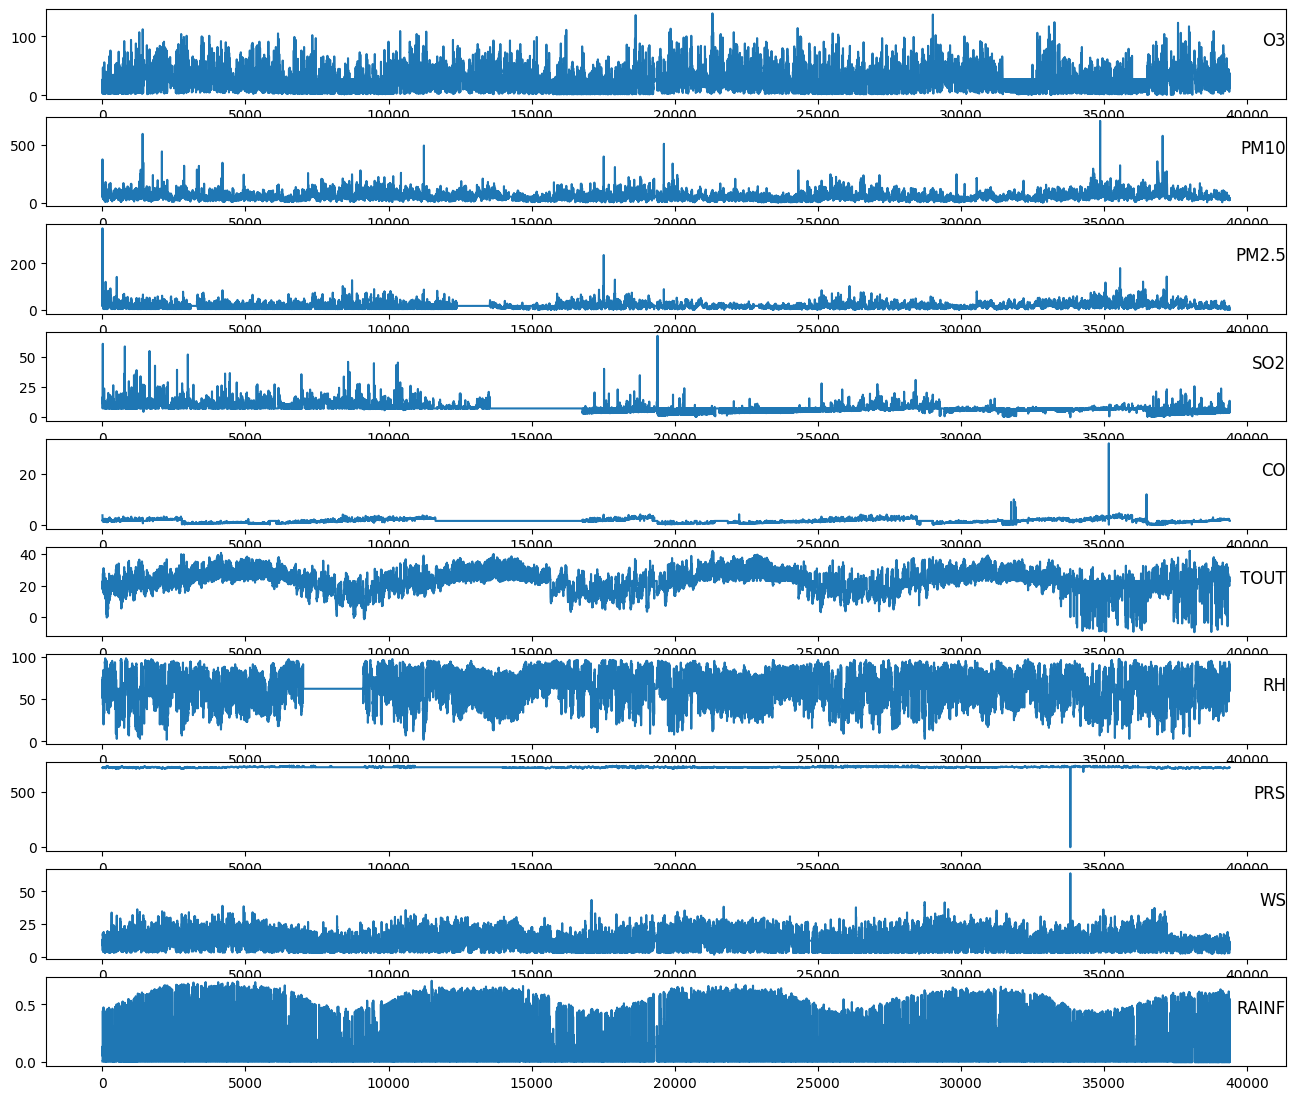

In [ ]:
values = df.values

groups = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 1

# plot each column
plt.figure(figsize=(16,14), dpi=100)

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
    
plt.show()

In [ ]:
df.dtypes

Fecha     object
O3       float64
PM10     float64
PM2.5    float64
SO2      float64
CO       float64
TOUT     float64
RH       float64
PRS      float64
WS       float64
RAINF    float64
SE       float64
dtype: object

In [4]:
df['Fecha'] = pd.to_datetime(df.Fecha, dayfirst=True)
df.dtypes

Fecha    datetime64[ns]
O3              float64
PM10            float64
PM2.5           float64
SO2             float64
CO              float64
TOUT            float64
RH              float64
PRS             float64
WS              float64
RAINF           float64
SR              float64
dtype: object

In [7]:
df

,Fecha,O3,PM10,PM2.5,SO2,CO,TOUT,RH,PRS,WS,RAINF,SR
0,2017-01-01 00:00:00,6.0,50.240716,18.443862,11.80000,3.77000,18.710000,72.000000,720.5,8.8,0.007,0.007
1,2017-01-01 01:00:00,5.0,373.000000,349.000000,16.70000,3.01000,19.670000,64.000000,720.1,13.1,0.007,0.007
2,2017-01-01 02:00:00,4.0,50.240716,187.000000,16.10000,1.80000,22.330000,51.000000,719.6,12.9,0.007,0.007
3,2017-01-01 03:00:00,4.0,124.000000,101.000000,13.70000,2.11000,20.510000,58.000000,719.5,9.1,0.007,0.007
4,2017-01-01 04:00:00,4.0,50.240716,81.000000,11.90000,1.77000,20.220000,60.000000,719.1,9.2,0.007,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...
39403,2021-06-30 19:00:00,18.0,24.000000,4.410000,6.60000,1.55267,22.960996,80.000000,722.9,5.7,0.022,0.022
39404,2021-06-30 20:00:00,22.0,29.000000,5.500000,4.50000,1.55267,22.960996,90.000000,723.2,8.4,0.003,0.003
39405,2021-06-30 21:00:00,17.0,30.000000,3.470000,4.70000,1.55267,22.960996,91.000000,723.3,5.4,0.002,0.002
39406,2021-06-30 22:00:00,12.0,33.000000,6.340000,5.30000,1.55267,22.960996,90.000000,723.6,6.2,0.002,0.002


In [8]:
def export_by_hour(df):
  to_export = df[df["Fecha"]]

In [ ]:
#Exports by hour and month of the year
"""
df_export = df
df_export['hour'] = df_export['Fecha'].apply(lambda x: x.hour)
df_export['day'] = df_export['Fecha'].apply(lambda x: x.day)
df_export['month'] = df_export['Fecha'].apply(lambda x: x.month)
df_export.drop('Fecha', axis=1, inplace=True)
df_export.head()
"""

#Export df by some hours only


"\ndf_export = df\ndf_export['hour'] = df_export['Fecha'].apply(lambda x: x.hour)\ndf_export['day'] = df_export['Fecha'].apply(lambda x: x.day)\ndf_export['month'] = df_export['Fecha'].apply(lambda x: x.month)\ndf_export.drop('Fecha', axis=1, inplace=True)\ndf_export.head()\n"

In [ ]:
# export_hour = df_export.drop(['day', 'month'], axis=1).groupby('hour').mean()
# export_day = df_export.drop(['hour', 'month'], axis=1).groupby('day').mean()
# export_month = df_export.drop(['hour', 'day'], axis=1).groupby('month').mean()

# export_hour.to_csv('group_hour.csv', index=False)
# export_day.to_csv('group_day.csv', index=False)
# export_month.to_csv('group_month.csv', index=False)

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [25]:
moving_avg_df

,moving_avg_week,moving_avg_month
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
39403,26.720238,31.196414
39404,26.666667,31.194926
39405,26.583333,31.187485
39406,26.464286,31.177069


Text(0, 0.5, 'O3')

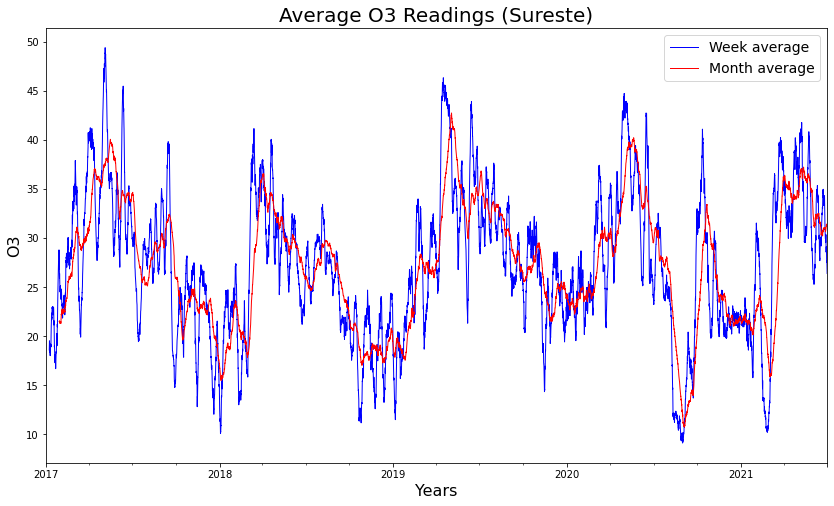

In [28]:
#Suavizado de línea de tiempo a partir de media móvil de una semana y un mes
df["moving_avg_week"] = df["O3"].rolling(24*7).mean()
df["moving_avg_month"] = df["O3"].rolling(24*7*4).mean()

moving_avg_df = df[["moving_avg_week", "moving_avg_month",'Fecha']]
moving_avg_df = moving_avg_df.set_index('Fecha')

colors = ['blue', 'red']

moving_avg_df.plot(color=colors, linewidth=1,  figsize=(14,8))
plt.legend(labels =["Week average", "Month average"], fontsize=14)
plt.title('Average O3 Readings (Sureste)', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('O3', fontsize=16)

In [18]:
#Visualización agrupando por meses
df["date_month"] = df["Fecha"].apply(lambda x: x.month)
df["date_year"] = df["Fecha"].apply(lambda x: x.year)

time_series = df.groupby(['date_year', 'date_month']).mean()
time_series

O3       PM10  ...  moving_avg_week  moving_avg_month
date_year date_month                        ...                                   
2017      1           21.359320  52.338582  ...        21.671113         21.467785
          2           28.865924  62.484704  ...        27.125114         24.634632
          3           31.605381  58.374627  ...        30.851108         29.869926
          4           36.787493  52.684722  ...        36.056554         35.229832
          5           35.934808  49.982153  ...        37.712666         38.079568
          6           33.829505  45.835057  ...        33.992286         33.998959
          7           25.514110  44.264735  ...        25.950409         28.356713
          8           30.423715  43.857850  ...        29.244447         28.188280
          9           25.961754  35.787395  ...        28.296484         30.268744
          10          23.764070  41.253509  ...        22.983859         22.820812
          11          23.199171  59.462114  ...        23.292384         23.535697
          12          17.430255  64.386026  ...        18.930872         21.177517
2018      1           22.007236  59.851428  ...        20.298919         18.360495
          2           17.990983  64.189262  ...        18.983476         20.783895
          3           36.205612  57.510180  ...        33.849585         27.880743
          4           32.083320  50.537114  ...        32.919869         34.023398
          5           29.080297  44.210648  ...        29.201260         30.479421
          6           26.464463  48.901697  ...        26.729205         28.316955
          7           27.508392  73.225012  ...        27.624846         26.088137
          8           28.127013  43.284330  ...        28.201658         28.893757
          9           22.371801  32.028364  ...        23.129138         24.840783
          10          17.891437  39.805755  ...        17.726956         19.725265
          11          18.650947  51.247914  ...        18.834042         18.436271
          12          19.565446  43.132068  ...        20.226114         18.820711
2019      1           19.668613  45.721948  ...        18.442233         18.716459
          2           28.142435  64.744351  ...        27.632760         24.084406
          3           26.725286  49.356103  ...        26.794823         26.942889
          4           39.969783  59.464068  ...        38.734711         33.748893
          5           33.284933  45.415496  ...        34.244400         37.599496
          6           34.185033  36.540303  ...        34.417139         33.327226
          7           33.426744  42.256023  ...        32.826120         33.863361
          8           30.532532  38.421071  ...        30.994852         32.071650
          9           26.103068  26.502980  ...        26.989124         28.222209
          10          28.504006  33.553464  ...        27.913151         27.047900
          11          21.989511  51.911984  ...        22.279561         25.140904
          12          24.756005  59.100383  ...        24.764108         24.233938
2020      1           24.302319  52.247673  ...        24.184495         23.536706
          2           25.494553  50.571323  ...        24.685270         24.398421
          3           30.539975  45.676672  ...        30.386455         29.405996
          4           35.389552  37.312688  ...        34.228630         31.099363
          5           37.404871  29.958084  ...        38.477190         38.725079
          6           29.346476  36.600822  ...        30.855009         33.162332
          7           27.419603  49.712113  ...        27.212899         28.690576
          8           12.872761  42.544792  ...        14.365395         19.455008
          9           20.157934  40.268409  ...        17.710951         14.114281
          10          29.463014  53.024890  ...        30.458629         28.593394
          11          23.475332  55.863558  .

In [19]:
time_series_numeric = time_series.drop(['moving_avg_week', 'moving_avg_month'], axis=1)
# time_series_numeric.drop('Unnamed: 11', axis=1, inplace=True)
time_series_numeric

O3       PM10  ...     RAINF        SR
date_year date_month                        ...                    
2017      1           21.359320  52.338582  ...  0.105007  0.105007
          2           28.865924  62.484704  ...  0.135790  0.135790
          3           31.605381  58.374627  ...  0.146473  0.146473
          4           36.787493  52.684722  ...  0.172958  0.172958
          5           35.934808  49.982153  ...  0.169200  0.169200
          6           33.829505  45.835057  ...  0.201180  0.201180
          7           25.514110  44.264735  ...  0.185797  0.185797
          8           30.423715  43.857850  ...  0.173885  0.173885
          9           25.961754  35.787395  ...  0.131016  0.131016
          10          23.764070  41.253509  ...  0.127877  0.127877
          11          23.199171  59.462114  ...  0.108705  0.108705
          12          17.430255  64.386026  ...  0.073818  0.073818
2018      1           22.007236  59.851428  ...  0.096688  0.096688
          2           17.990983  64.189262  ...  0.084629  0.084629
          3           36.205612  57.510180  ...  0.145068  0.145068
          4           32.083320  50.537114  ...  0.136884  0.136884
          5           29.080297  44.210648  ...  0.163198  0.163198
          6           26.464463  48.901697  ...  0.172948  0.172948
          7           27.508392  73.225012  ...  0.186938  0.186938
          8           28.127013  43.284330  ...  0.180082  0.180082
          9           22.371801  32.028364  ...  0.118485  0.118485
          10          17.891437  39.805755  ...  0.097625  0.097625
          11          18.650947  51.247914  ...  0.091192  0.091192
          12          19.565446  43.132068  ...  0.089199  0.089199
2019      1           19.668613  45.721948  ...  0.089846  0.089846
          2           28.142435  64.744351  ...  0.107983  0.107983
          3           26.725286  49.356103  ...  0.108209  0.108209
          4           39.969783  59.464068  ...  0.169213  0.169213
          5           33.284933  45.415496  ...  0.137358  0.137358
          6           34.185033  36.540303  ...  0.182404  0.182404
          7           33.426744  42.256023  ...  0.183003  0.183003
          8           30.532532  38.421071  ...  0.183651  0.183651
          9           26.103068  26.502980  ...  0.141014  0.141014
          10          28.504006  33.553464  ...  0.126315  0.126315
          11          21.989511  51.911984  ...  0.100947  0.100947
          12          24.756005  59.100383  ...  0.097651  0.097651
2020      1           24.302319  52.247673  ...  0.090989  0.090989
          2           25.494553  50.571323  ...  0.108059  0.108059
          3           30.539975  45.676672  ...  0.117551  0.117551
          4           35.389552  37.312688  ...  0.130980  0.130980
          5           37.404871  29.958084  ...  0.160023  0.160023
          6           29.346476  36.600822  ...  0.168931  0.168931
          7           27.419603  49.712113  ...  0.164209  0.164209
          8           12.872761  42.544792  ...  0.177435  0.177435
          9           20.157934  40.268409  ...  0.130106  0.130106
          10          29.463014  53.024890  ...  0.135800  0.135800
          11          23.475332  55.863558  ...  0.101204  0.190083
          12          21.780172  82.610507  ...  0.109889  0.109889
2021      1           22.171281  63.106743  ...  0.100294  0.100294
          2           16.759107  60.319526  ...  0.109853  0.109853
          3           34.603468  84.347258  ...  0.134378  0.134378
          4           34.536063  62.900411  ...  0.119672  0.119672
          5           34.004895  48.416913  ...  0.137821  0.137821
          6           30.821511  48.506068  ...  0.166473  0.166473

[54 rows x 11 columns]

In [23]:
pollutants = time_series_numeric[['O3', 'PM10', 'PM2.5', 'SO2', 'CO']]
environment = time_series_numeric[['O3','TOUT', 'RH', 'SR' ,'PRS', 'WS', 'RAINF']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f436f45aa90>,
      dtype=object)

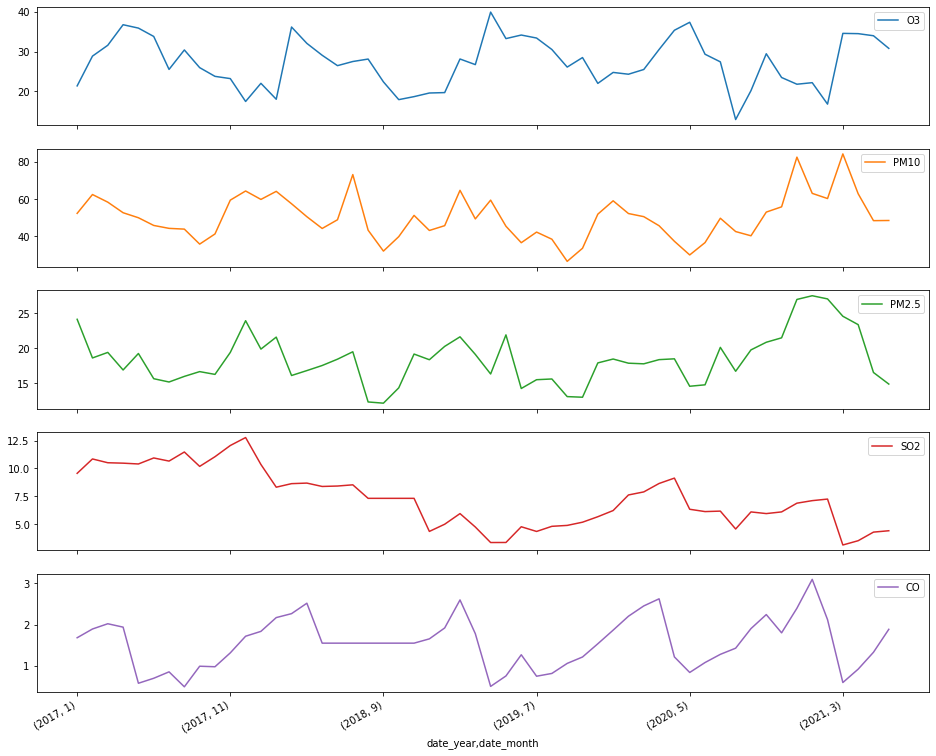

In [21]:
pollutants.plot(subplots=True, figsize=(16,14))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f436e2b7dd0>,
      dtype=object)

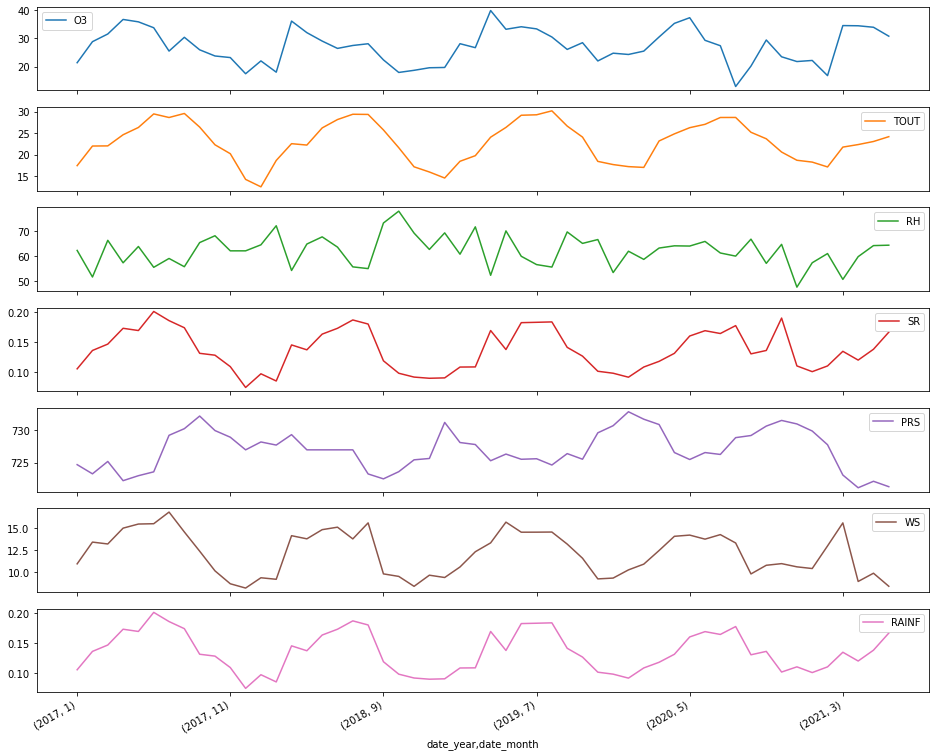

In [24]:
environment.plot(subplots=True, figsize=(16,14))

In [ ]:
seasonal_df = df.drop(['moving_avg_week', 'moving_avg_month', 'date_month', 'date_year'], axis=1)
seasonal_df['date_strip_hour'] = seasonal_df['Fecha'].apply(lambda x: x.date())
seasonal_df['month_year'] = seasonal_df['date_strip_hour'].apply(lambda x: datetime.date(year=x.year, month=x.month, day=1))
days_df = seasonal_df.groupby('month_year', as_index=False).mean()
days_df['month_year'] = pd.to_datetime(days_df.month_year)
days_df.index = days_df.month_year
days_df.head()

,month_year,O3,PM10,PM2.5,SO2,CO,TOUT,RH,PRS,WS,RAINF,SE
month_year,,,,,,,,,,,,
2017-01-01,2017-01-01,21.359320,52.338582,24.115184,9.561628,1.683882,17.411000,62.257969,724.675762,10.968021,0.105007,0.105007
2017-02-01,2017-02-01,28.865924,62.484704,18.619766,10.849826,1.895690,21.988997,51.652077,723.251660,13.411072,0.135790,0.135790
2017-03-01,2017-03-01,31.605381,58.374627,19.406563,10.510122,2.022984,22.021862,66.299377,725.170607,13.200641,0.146473,0.146473
2017-04-01,2017-04-01,36.787493,52.684722,16.908826,10.472421,1.940744,24.623250,57.309722,722.190694,14.977778,0.172958,0.172958
2017-05-01,2017-05-01,35.934808,49.982153,19.252420,10.399945,0.581213,26.324289,63.830768,722.962156,15.438834,0.169200,0.169200


In [ ]:
decompose_result = seasonal_decompose(days_df['O3'], model='additive')

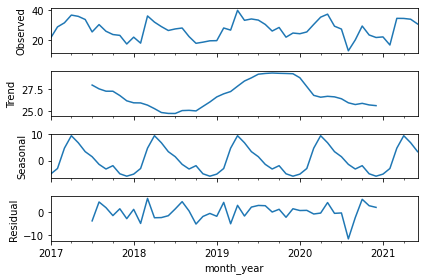

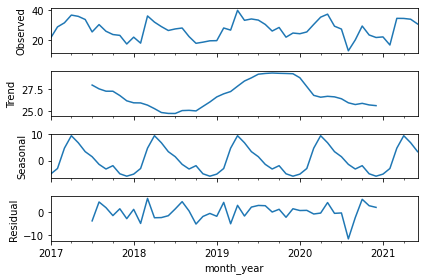

In [ ]:
decompose_result.plot()

In [ ]:
df["date_hour"] = df["Fecha"].apply(lambda x: x.year)
df["date_day"] = df["Fecha"].apply(lambda x: x.year)
df["date_month"] = df["Fecha"].apply(lambda x: x.month)
df["date_year"] = df["Fecha"].apply(lambda x: x.year)

time_series = df.groupby(['date_year', 'date_month']).mean()
time_series

O3       PM10  ...  date_hour  date_day
date_year date_month                        ...                     
2017      1           21.359320  52.338582  ...       2017      2017
          2           28.865924  62.484704  ...       2017      2017
          3           31.605381  58.374627  ...       2017      2017
          4           36.787493  52.684722  ...       2017      2017
          5           35.934808  49.982153  ...       2017      2017
          6           33.829505  45.835057  ...       2017      2017
          7           25.514110  44.264735  ...       2017      2017
          8           30.423715  43.857850  ...       2017      2017
          9           25.961754  35.787395  ...       2017      2017
          10          23.764070  41.253509  ...       2017      2017
          11          23.199171  59.462114  ...       2017      2017
          12          17.430255  64.386026  ...       2017      2017
2018      1           22.007236  59.851428  ...       2018      2018
          2           17.990983  64.189262  ...       2018      2018
          3           36.205612  57.510180  ...       2018      2018
          4           32.083320  50.537114  ...       2018      2018
          5           29.080297  44.210648  ...       2018      2018
          6           26.464463  48.901697  ...       2018      2018
          7           27.508392  73.225012  ...       2018      2018
          8           28.127013  43.284330  ...       2018      2018
          9           22.371801  32.028364  ...       2018      2018
          10          17.891437  39.805755  ...       2018      2018
          11          18.650947  51.247914  ...       2018      2018
          12          19.565446  43.132068  ...       2018      2018
2019      1           19.668613  45.721948  ...       2019      2019
          2           28.142435  64.744351  ...       2019      2019
          3           26.725286  49.356103  ...       2019      2019
          4           39.969783  59.464068  ...       2019      2019
          5           33.284933  45.415496  ...       2019      2019
          6           34.185033  36.540303  ...       2019      2019
          7           33.426744  42.256023  ...       2019      2019
          8           30.532532  38.421071  ...       2019      2019
          9           26.103068  26.502980  ...       2019      2019
          10          28.504006  33.553464  ...       2019      2019
          11          21.989511  51.911984  ...       2019      2019
          12          24.756005  59.100383  ...       2019      2019
2020      1           24.302319  52.247673  ...       2020      2020
          2           25.494553  50.571323  ...       2020      2020
          3           30.539975  45.676672  ...       2020      2020
          4           35.389552  37.312688  ...       2020      2020
          5           37.404871  29.958084  ...       2020      2020
          6           29.346476  36.600822  ...       2020      2020
          7           27.419603  49.712113  ...       2020      2020
          8           12.872761  42.544792  ...       2020      2020
          9           20.157934  40.268409  ...       2020      2020
          10          29.463014  53.024890  ...       2020      2020
          11          23.475332  55.863558  ...       2020      2020
          12          21.780172  82.610507  ...       2020      2020
2021      1           22.171281  63.106743  ...       2021      2021
          2           16.759107  60.319526  ...       2021      2021
          3           34.603468  84.347258  ...       2021      2021
          4           34.536063  62.900411  ...       2021      2021
          5           34.004895  48.416913  ...       2021      2021
          6           30.821511  48.506068  ...       2021      2021

[54 rows x 15 columns]

In [ ]:
x = df[["PM10", "PM2.5", "SO2", "CO", "TOUT", "RH", "PRS", "WS", "RAINF", "SE"]].values
y = df["O3"].values

In [ ]:
log = linear_model.LinearRegression()
rid = linear_model.Ridge()
las = linear_model.Lasso()
lar = linear_model.Lars()

models = [log, rid, las, lar]

for model in models:
    print(model.__class__.__name__)
    model.fit(x, y)
    print(model.score(x,y))

LinearRegression
0.4855938687851722
Ridge
0.48559372310865784
Lasso
0.4153225065490781
Lars
0.4855938687851721


In [ ]:
m = NeuralProphet(
    n_forecasts=168,
    n_lags=336,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    epochs=10
    ) # ARNet 
m = m.add_lagged_regressor(name='TOUT')
m = m.add_lagged_regressor(name='SE')
m = m.add_lagged_regressor(name='RAINF')
m = m.add_lagged_regressor(name='RH')
m = m.add_lagged_regressor(name='PRS')

In [ ]:
neural_df = df.copy()
neural_df.rename(columns={"Fecha":"ds", "O3":"y"}, inplace=True)
neural_df = neural_df[["ds","y", "TOUT", "SE", "RAINF", "RH", "PRS"]]
neural_df.head()

,ds,y,TOUT,SE,RAINF,RH,PRS
0,2017-01-01 00:00:00,6.0,18.71,0.007,0.007,72.0,720.5
1,2017-01-01 01:00:00,5.0,19.67,0.007,0.007,64.0,720.1
2,2017-01-01 02:00:00,4.0,22.33,0.007,0.007,51.0,719.6
3,2017-01-01 03:00:00,4.0,20.51,0.007,0.007,58.0,719.5
4,2017-01-01 04:00:00,4.0,20.22,0.007,0.007,60.0,719.1


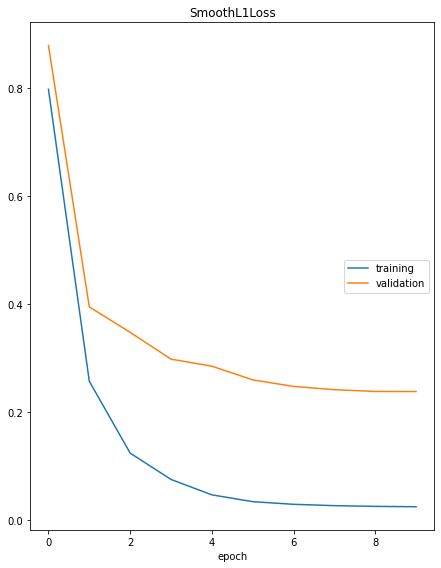

Epoch[10/10]: 100%|██████████| 10/10 [01:12<00:00,  7.21s/it, SmoothL1Loss=0.0243, MAE=10.6, RegLoss=0, MAE_val=27.2, SmoothL1Loss_val=0.238]


In [ ]:
metrics = m.fit(neural_df, freq="H", plot_live_loss=True, validate_each_epoch=True, valid_p=0.2)

In [ ]:
future = m.make_future_dataframe(neural_df, 
                                 periods=240,
                                 regressors_df=neural_df[["TOUT", "SE", "RAINF", "RH", "PRS"]])
future

,ds,y,TOUT,SE,RAINF,RH,PRS,t,y_scaled
0,2021-06-17 00:00:00,19.0,0.629106,0.103404,0.103404,0.946512,0.590667,1.240657,0.372
1,2021-06-17 01:00:00,14.0,0.633652,0.103404,0.103404,0.927907,0.569333,1.240688,0.292
2,2021-06-17 02:00:00,5.0,0.641071,0.103404,0.103404,0.927907,0.555111,1.240720,0.148
3,2021-06-17 03:00:00,7.0,0.629345,0.103404,0.103404,0.918605,0.533778,1.240752,0.180
4,2021-06-17 04:00:00,9.0,0.623602,0.103404,0.103404,0.918605,0.526667,1.240784,0.212
...,...,...,...,...,...,...,...,...,...
499,2021-07-07 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.256501,NaN
500,2021-07-07 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.256533,NaN
501,2021-07-07 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.256565,NaN
502,2021-07-07 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.256597,NaN


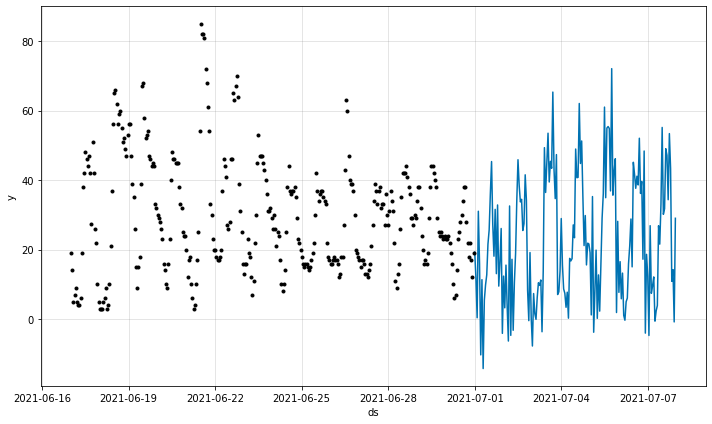

In [ ]:
forecast = m.predict(future)
m.plot(forecast)
plt.show()

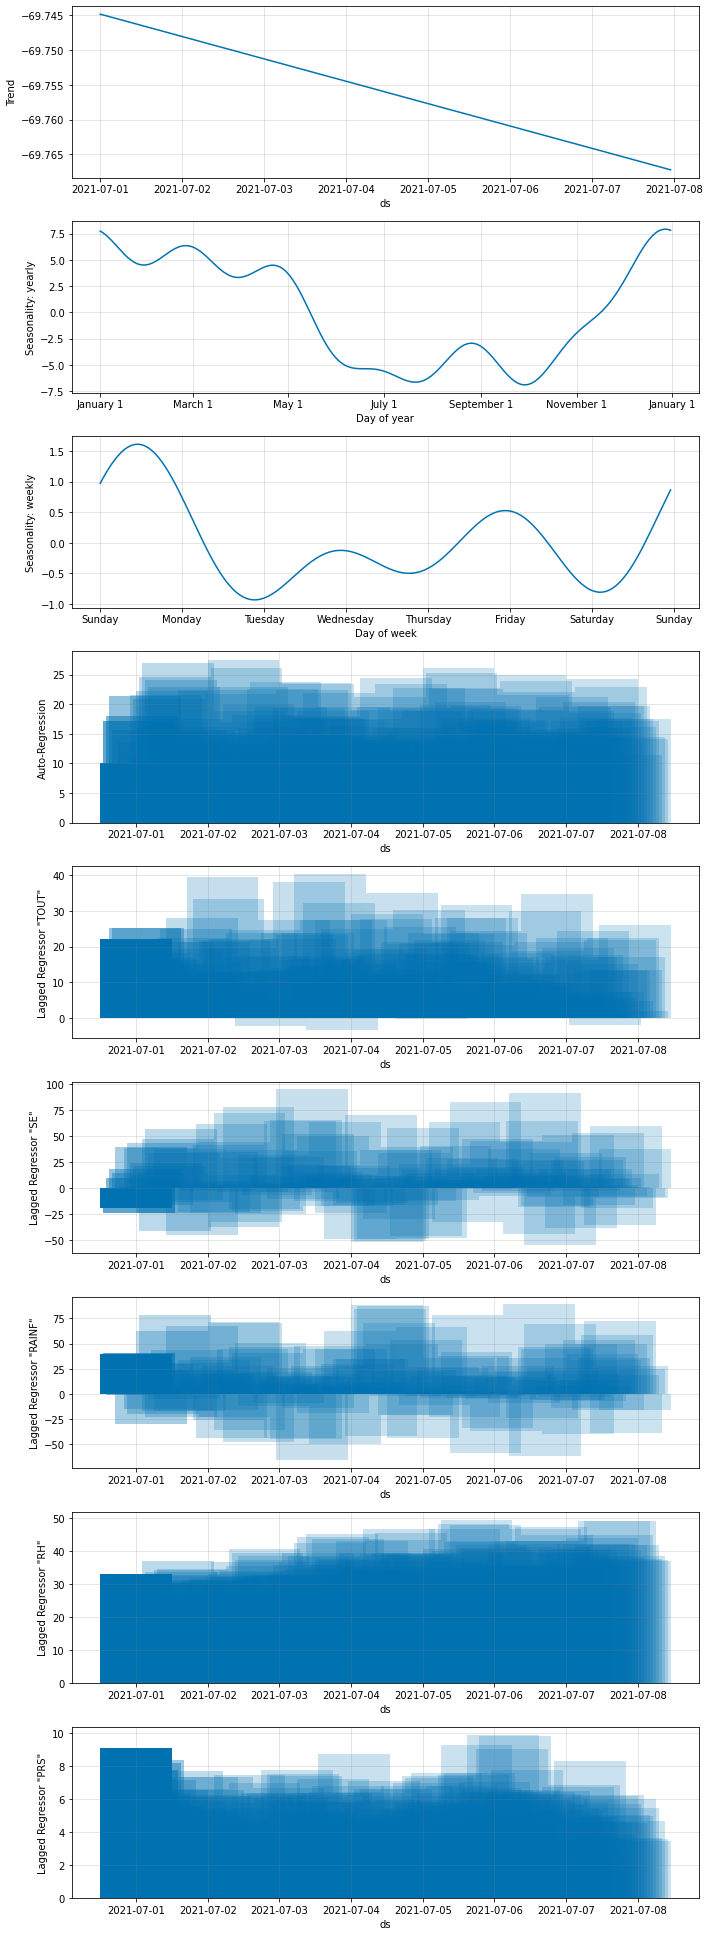

In [ ]:
m.plot_components(forecast)
plt.show()